### Оцифровка дыхания
#### В данном ноутбуке реализуется оцифровка дыхания (из волны в буквы)

In [98]:
import warnings
import time
import os

warnings.simplefilter(action='ignore')

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import librosa
import sklearn
from scipy.spatial.distance import euclidean
from scipy.signal import correlate
from dtw import dtw

In [31]:
def load_audio(file_path):
    # Load the audio file
    signal, sr = librosa.load(file_path, sr=None)
    return signal, sr

def compare_waveforms(signal1, signal2):
    # Normalize signals
    signal1 = signal1 / np.max(np.abs(signal1))
    signal2 = signal2 / np.max(np.abs(signal2))
    # Compute cross-correlation
    correlation = correlate(signal1, signal2, mode='full')
    max_corr = np.max(correlation)
    return max_corr

def compare_mfcc(file1, file2):
    # Extract MFCC features
    signal1, sr1 = load_audio(file1)
    signal2, sr2 = load_audio(file2)
    mfcc1 = librosa.feature.mfcc(y=signal1, sr=sr1, n_mfcc=13)
    mfcc2 = librosa.feature.mfcc(y=signal2, sr=sr2, n_mfcc=13)

    # Use Dynamic Time Warping (DTW) to measure similarity
    distance, _, _, _ = dtw(mfcc1.T, mfcc2.T, dist_method=euclidean)
    return distance

In [90]:
data_path = 'modified_letters/'
x , sr = load_audio(data_path + 'ф.wav')

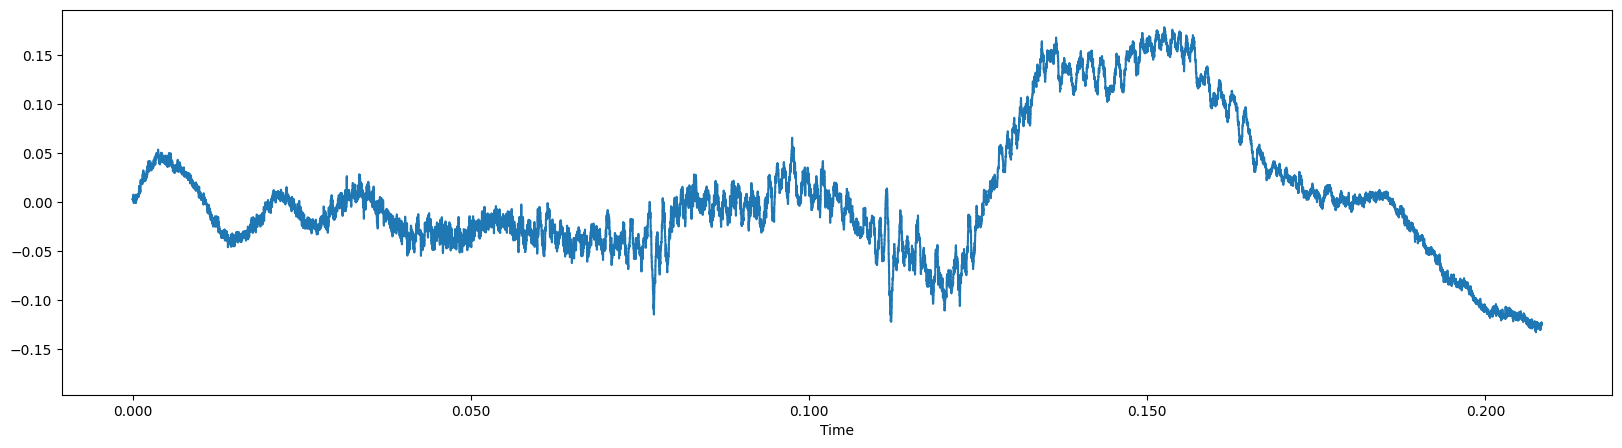

In [91]:
%matplotlib inline

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

In [52]:
file1 = "modified_letters/х.wav"
file2 = "modified_letters/х.wav"

# Load audio
signal1, sr1 = load_audio(file1)
signal2, sr2 = load_audio(file2)

# Waveform similarity
waveform_similarity = compare_waveforms(signal1, signal2)
print(f"Waveform Similarity (Max Correlation): {waveform_similarity}")

# MFCC similarity
# mfcc_distance = compare_mfcc(file1, file2)
# print(f"MFCC Distance: {mfcc_distance}")

Waveform Similarity (Max Correlation): 1087.932861328125


In [97]:
from pydub import AudioSegment
import glob
import random

work_directory = "modified_data/"
breath_files = glob.glob(work_directory + "*.wav")
letters = glob.glob("letters_source_files/*.wav")

for b in random.sample(breath_files, 10):
    breath_audio, sr = load_audio(b)
    duration = librosa.get_duration(y=breath_audio, sr=sr) * 1000
    breath = AudioSegment.from_wav(b)

    print(b + ":", end=' ')
    for x in range(0, int(duration), 200):
        breath_fragment = breath[x:x+200]
        temp_output = "temp_fragment.wav"
        breath_fragment.export(temp_output, format='wav')

        # comparing
        best_similarity = {}
        breath_fragment_for_comparing, sr1 = load_audio(temp_output)
        for letter in letters:
            # print(letter)
            current_letter, sr2 = load_audio(letter)
            waveform_similarity = compare_waveforms(breath_fragment_for_comparing, current_letter)
            best_similarity[letter[15]] = float(waveform_similarity)
        print(max(best_similarity, key=best_similarity.get), end='')
    print("")

os.remove(temp_output)


modified_data/exhale_53.wav: ффттфффф
modified_data/inhale_33.wav: хфффттффтффффф
modified_data/inhale_31.wav: ффтффтфтфффс
modified_data/inhale_9.wav: ффттффтффффффттф
modified_data/exhale_22.wav: фффффффффттттфф
modified_data/exhale_25.wav: фффффффффффт
modified_data/exhale_49.wav: ффттфтфффттт
modified_data/exhale_88.wav: фтфттффффф
modified_data/exhale_16.wav: нфффффффффтффф
modified_data/inhale_55.wav: ффффтфффф


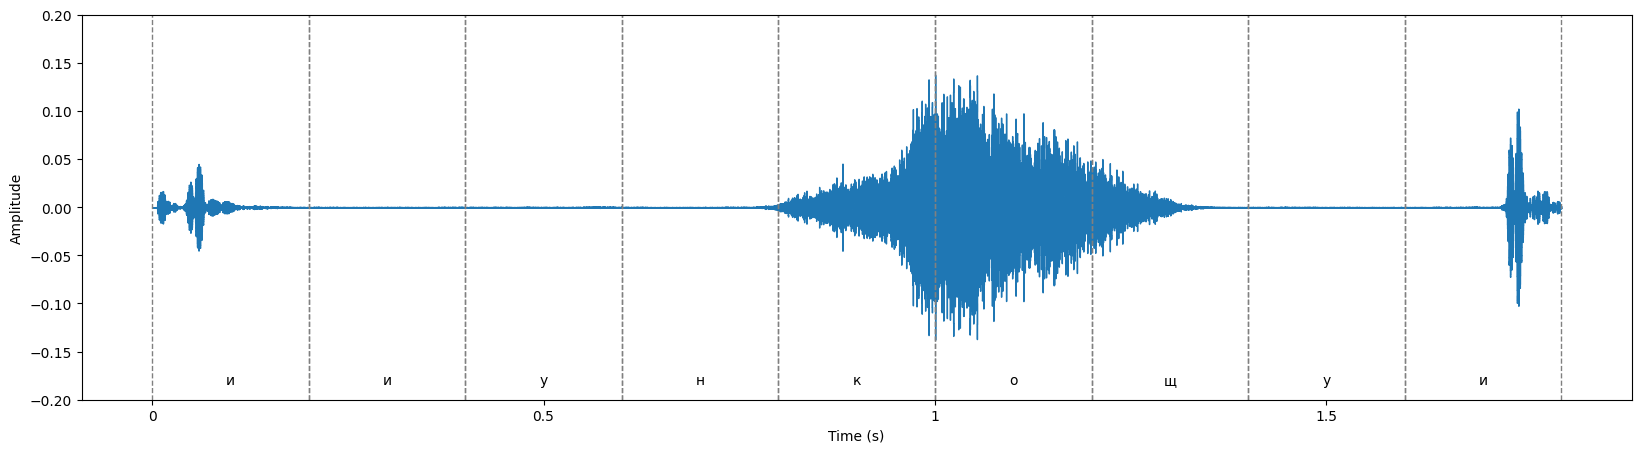

In [109]:
import string


data_path = "web_recordings/z/z_inhale_1.wav"
x , sr = librosa.load(data_path)

plt.figure(figsize=(20, 5))
translate = 'ииункощуи'

librosa.display.waveshow(x, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
duration = librosa.get_duration(y=x, sr=sr)
time_points = np.arange(0.1, duration, 0.2)

letters = list(translate)

# Add letters under the x-axis
for t, letter in zip(time_points, letters):
    plt.text(t, -0.18, letter, ha='center', va='center', fontsize=10, transform=plt.gca().transData)
    plt.axvline(x=t-0.1, color='gray', linestyle='--', linewidth=1)  # Vertical line at time 't-0.1'
    plt.axvline(x=t+0.1, color='gray', linestyle='--', linewidth=1)  # Vertical line at time 't+0.1'


# Adjust the limits and show the plot
plt.ylim(-0.2, 0.2)  # Adjust the y-axis to avoid overlap
plt.show()